In [1]:
import pandas as pd
import numpy as np

from axisfuzzy.analysis.app.model import Model
from axisfuzzy.analysis.accessor import FuzzyAccessor
from axisfuzzy.analysis.component.basic import (
    ToolNormalization,
    ToolFuzzification,
    ToolSimpleAggregation
)
from axisfuzzy.analysis.build_in import ContractCrispTable, ContractFuzzyTable
from axisfuzzy.fuzzifier import Fuzzifier

In [2]:
my_fuzzifier = Fuzzifier(
    mf='gaussmf',
    mtype='qrofn',  # 假设目标是 q-rung orthopair fuzzy number
    pi = 0.2,
    mf_params=[{'sigma': 0.15, 'c': 0.5}]
)

In [3]:
# --- 子模型：数据预处理流程 ---
class DataPreprocessingModel(Model):
    def get_config(self) -> dict:
        pass

    def __init__(self, norm_method: str = 'min_max'):
        super().__init__() # __init__ 现在只做初始化
        self.normalizer = ToolNormalization(method=norm_method, axis=0)
        self.fuzzifier = ToolFuzzification(fuzzifier=my_fuzzifier)

    def forward(self, data: ContractCrispTable) -> ContractFuzzyTable:
        norm_data = self.normalizer(data)
        # fuzzy_data = self.fuzzifier(norm_data)
        return norm_data

In [4]:
class MainAnalysisModel(Model):
    def get_config(self) -> dict:
        pass

    def __init__(self):
        super().__init__() # __init__ 现在只做初始化
        self.preprocessing_pipeline = DataPreprocessingModel(norm_method='z_score')
        self.aggregator = ToolSimpleAggregation(operation='mean', axis=1)

    def forward(self, raw_input_data: ContractCrispTable):
        processed_data = self.preprocessing_pipeline(raw_input_data)
        final_scores = self.aggregator(processed_data)
        return final_scores

In [5]:
df = pd.DataFrame(np.random.rand(5, 4), columns=[f'Feature_{i}' for i in range(4)])

In [6]:
main_model = MainAnalysisModel()

In [7]:
df.fuzzy.run(main_model, return_intermediate=True)

--- Building FuzzyPipeline for 'MainAnalysisModel'... ---
--- Building FuzzyPipeline for 'DataPreprocessingModel'... ---
--- Starting symbolic trace of 'forward' method... ---
  > Tracing call to 'ToolNormalization'...
--- Symbolic trace complete. ---
--- FuzzyPipeline for 'DataPreprocessingModel' built successfully. ---

--- Starting symbolic trace of 'forward' method... ---
  > Tracing call to 'DataPreprocessingModel'...
  > Tracing call to 'ToolSimpleAggregation'...
--- Symbolic trace complete. ---
--- FuzzyPipeline for 'MainAnalysisModel' built successfully. ---



(0    0.392218
 1   -0.398448
 2    0.555072
 3   -0.365986
 4   -0.182856
 dtype: float64,
 {'input_raw_input_data_1123be31':    Feature_0  Feature_1  Feature_2  Feature_3
  0   0.293259   0.952607   0.450071   0.758233
  1   0.332026   0.507057   0.196645   0.681198
  2   0.996003   0.639095   0.839255   0.355470
  3   0.668303   0.488200   0.511366   0.162439
  4   0.422584   0.443325   0.928453   0.265380,
  'DataPreprocessingModel_dd78a640':    Feature_0  Feature_1  Feature_2  Feature_3
  0  -0.851801   1.674325  -0.452145   1.198494
  1  -0.719277  -0.478308  -1.300378   0.904170
  2   1.550510   0.159620   0.850479  -0.340320
  3   0.430275  -0.569414  -0.246984  -1.077822
  4  -0.409707  -0.786222   1.149028  -0.684522,
  'ToolSimpleAggregation_run_9407254a': 0    0.392218
  1   -0.398448
  2    0.555072
  3   -0.365986
  4   -0.182856
  dtype: float64})

In [8]:
main_model = MainAnalysisModel()
main_model.build()

--- Building FuzzyPipeline for 'MainAnalysisModel'... ---
--- Building FuzzyPipeline for 'DataPreprocessingModel'... ---
--- Starting symbolic trace of 'forward' method... ---
  > Tracing call to 'ToolNormalization'...
--- Symbolic trace complete. ---
--- FuzzyPipeline for 'DataPreprocessingModel' built successfully. ---

--- Starting symbolic trace of 'forward' method... ---
  > Tracing call to 'DataPreprocessingModel'...
  > Tracing call to 'ToolSimpleAggregation'...
--- Symbolic trace complete. ---
--- FuzzyPipeline for 'MainAnalysisModel' built successfully. ---



In [9]:
main_model.summary()

Model: "MainAnalysisModel"
Layer (type)                    Input Contracts             Output Contracts    
--------------------------------------------------------------------------------
Input: raw_input_data           -                           ContractCrispTable  
DataPreprocessingModel          ContractCrispTable          ContractCrispTable  
  └─ ToolNormalization          ContractCrispTable          ContractCrispTable  
ToolSimpleAggregation           ContractCrispTable          ContractWeightVector
--------------------------------------------------------------------------------
Total layers: 2 (including 1 nested model(s) with 1 sub-layers)


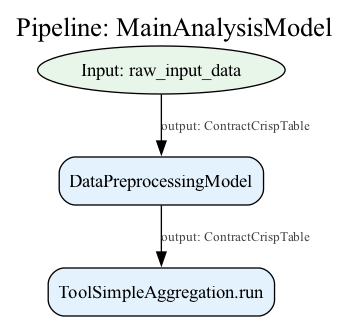

In [10]:
main_model.visualize()

In [11]:
main_model.run(df)

0    0.392218
1   -0.398448
2    0.555072
3   -0.365986
4   -0.182856
dtype: float64